### Simple recommender (Using correlation)

In [2]:
import numpy as np
import pandas as pd

In [3]:
df1 = pd.read_csv("D:\F\Coding\Projects\Movie Recommendation\Dataset\movie_small.csv")
df2 = pd.read_csv("D:\F\Coding\Projects\Movie Recommendation\Dataset\\ratings_small.csv")

In [4]:
movie = pd.DataFrame()
movie = pd.merge(df1,df2, on = 'movieId')


In [5]:
movie.drop(['genres'], inplace=True, axis=1)
movie


,movieId,title,userId,rating
0,1,Toy Story (1995),6,5.0
1,1,Toy Story (1995),8,4.0
2,1,Toy Story (1995),10,4.0
3,1,Toy Story (1995),23,4.0
4,1,Toy Story (1995),39,5.0
...,...,...,...,...
2362,69481,"Hurt Locker, The (2008)",6762,4.0
2363,69746,Watchmen: Tales of the Black Freighter (2009),1513,5.0
2364,69784,BrÃ¼no (Bruno) (2009),6778,1.5
2365,69951,"Imaginarium of Doctor Parnassus, The (2009)",1513,5.0


EDA

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: >

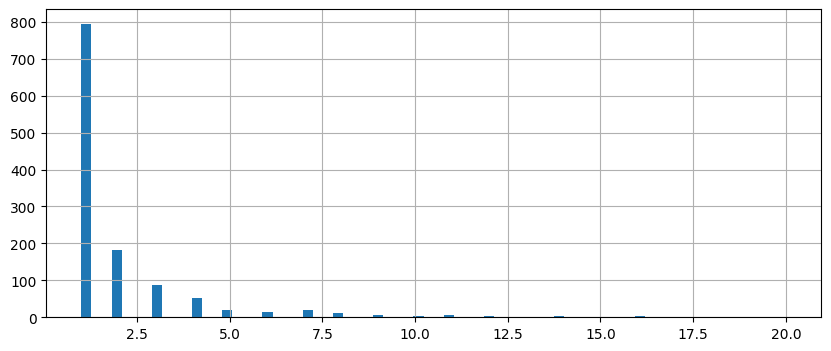

In [17]:
plt.figure(figsize= (10,4))
ratings['no. of ratings'].hist(bins = 70)

<AxesSubplot: >

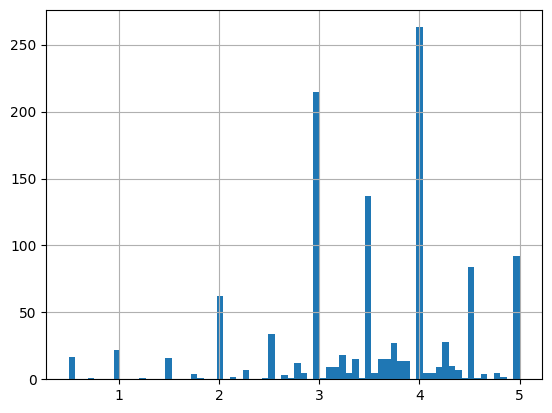

In [18]:
plt.Figure(figsize=(10,4))
ratings['rating'].hist(bins = 70)

In [8]:
g = movie.groupby('title')['rating'].count().sort_values(ascending = False)
g.head()


title
Pulp Fiction (1994)                          20
Star Wars: Episode IV - A New Hope (1977)    16
Shawshank Redemption, The (1994)             16
Forrest Gump (1994)                          16
Jurassic Park (1993)                         15
Name: rating, dtype: int64

In [9]:
ratings = pd.DataFrame(movie.groupby('title')['rating'].mean())
ratings['no. of ratings'] = pd.DataFrame(movie.groupby('title')['rating'].count())
ratings.sort_values('no. of ratings',ascending = False)


,rating,no. of ratings
title,,
Pulp Fiction (1994),4.500000,20
Star Wars: Episode IV - A New Hope (1977),4.062500,16
"Shawshank Redemption, The (1994)",4.562500,16
Forrest Gump (1994),3.875000,16
Jurassic Park (1993),3.733333,15
...,...,...
"Closet, The (Placard, Le) (2001)",4.000000,1
Closer (2004),4.000000,1
City of God (Cidade de Deus) (2002),4.000000,1


In [10]:
movie_mat = pd.pivot_table(movie,index = 'userId',columns = 'title',values = 'rating')
movie_mat.head()

title,'Round Midnight (1986),10 Things I Hate About You (1999),101 Dalmatians (1996),1492: Conquest of Paradise (1992),1900 (Novecento) (1976),1984 (Nineteen Eighty-Four) (1984),200 Cigarettes (1999),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),21 Up (1977),...,You Can Count on Me (2000),You Don't Mess with the Zohan (2008),You've Got Mail (1998),Young Frankenstein (1974),Young Sherlock Holmes (1985),Z (1969),Zack and Miri Make a Porno (2008),Zoolander (2001),[REC] (2007),eXistenZ (1999)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
ratings.sort_values('no. of ratings',ascending = False).head(10)

,rating,no. of ratings
title,,
Pulp Fiction (1994),4.500000,20
Star Wars: Episode IV - A New Hope (1977),4.062500,16
"Shawshank Redemption, The (1994)",4.562500,16
Forrest Gump (1994),3.875000,16
Jurassic Park (1993),3.733333,15
Braveheart (1995),4.178571,14
"Usual Suspects, The (1995)",4.428571,14
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.750000,14
Dumb & Dumber (Dumb and Dumber) (1994),3.115385,13


In [12]:
jurassic_park_rating = movie_mat['Jurassic Park (1993)']
jurassic_park_rating.head()

userId
1    NaN
2    NaN
3    NaN
4    4.0
5    4.0
Name: Jurassic Park (1993), dtype: float64

In [13]:
demolition_man_rating = movie_mat['Demolition Man (1993)']
demolition_man_rating.head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: Demolition Man (1993), dtype: float64

In [14]:
similar_to_jurassic_park = movie_mat.corrwith(jurassic_park_rating)
similar_to_demolition_man = movie_mat.corrwith(demolition_man_rating)

c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\core\_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2845: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2704: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
c:\Users\Prakhar\AppData\Local\Programs\Python\Python310\lib\

In [15]:
corr_jurassic_park = pd.DataFrame(similar_to_jurassic_park,columns = ['Correlation'])
corr_jurassic_park.dropna(inplace = True)
corr_jurassic_park.head()

,Correlation
Ace Ventura: Pet Detective (1994),2.711021e-17
Addams Family Values (1993),1.000000e+00
Aladdin (1992),3.273268e-01
American Beauty (1999),1.000000e+00
"American President, The (1995)",9.486833e-01


In [16]:
corr_jurassic_park.sort_values('Correlation',ascending = False).head(10)

,Correlation
Groundhog Day (1993),1.0
"Firm, The (1993)",1.0
Casper (1995),1.0
Braveheart (1995),1.0
Die Hard: With a Vengeance (1995),1.0
"Sixth Sense, The (1999)",1.0
"Client, The (1994)",1.0
Addams Family Values (1993),1.0
Hot Shots! Part Deux (1993),1.0
"Nightmare Before Christmas, The (1993)",1.0


In [28]:
df = pd.DataFrame({'A': ['John', 'Boby', 'Mina', 'Peter', 'Nicky'],
      'B': ['Masters', 'Graduate', 'Graduate', 'Masters', 'Graduate'],
      'C': [27, 23, 21, 23, 24]})
df
df.iloc[0]

A       John
B    Masters
C         27
Name: 0, dtype: object

In [36]:
table = pd.pivot_table(df, index ='A',columns = 'B', values = 'C')  
table

B,Graduate,Masters
A,,
Boby,23.0,NaN
John,NaN,27.0
Mina,21.0,NaN
Nicky,24.0,NaN
Peter,NaN,23.0


In [39]:
table.loc['John']


B
Graduate     NaN
Masters     27.0
Name: John, dtype: float64